knock90

In [1]:
!wget http://www.phontron.com/kftt/download/kftt-data-1.0.tar.gz
!tar -zxvf kftt-data-1.0.tar.gz

--2021-07-06 07:11:05--  http://www.phontron.com/kftt/download/kftt-data-1.0.tar.gz
Resolving www.phontron.com (www.phontron.com)... 208.113.196.149
Connecting to www.phontron.com (www.phontron.com)|208.113.196.149|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99246893 (95M) [application/gzip]
Saving to: ‘kftt-data-1.0.tar.gz’

kftt-data-1.0.tar.g 100%[===================>]  94.65M  33.2MB/s    in 2.8s    

2021-07-06 07:11:08 (33.2 MB/s) - ‘kftt-data-1.0.tar.gz’ saved [99246893/99246893]

kftt-data-1.0/
kftt-data-1.0/data/
kftt-data-1.0/data/orig/
kftt-data-1.0/data/orig/kyoto-tune.en
kftt-data-1.0/data/orig/kyoto-dev.ja
kftt-data-1.0/data/orig/kyoto-dev.en
kftt-data-1.0/data/orig/kyoto-train.en
kftt-data-1.0/data/orig/kyoto-tune.ja
kftt-data-1.0/data/orig/kyoto-train.ja
kftt-data-1.0/data/orig/kyoto-test.ja
kftt-data-1.0/data/orig/kyoto-test.en
kftt-data-1.0/data/tok/
kftt-data-1.0/data/tok/kyoto-tune.en
kftt-data-1.0/data/tok/kyoto-dev.ja
kftt-data-1.0/dat

knock91

In [2]:
!pip3 install fairseq

     |████████████████████████████████| 1.7MB 7.2MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
     |████████████████████████████████| 153kB 49.3MB/s 
     |████████████████████████████████| 81kB 11.5MB/s 
     |████████████████████████████████| 112kB 37.2MB/s 
     |████████████████████████████████| 645kB 35.7MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-cp37-none-any.whl size=141231 sha256=4a735c073fe32fb4077eb980ca2774102fe2426531fbc264d6c41fd7e2c78336
  Stored in directory: /root/.cache/pip/wheels/e3/e2/fa/b78480b448b8579ddf393bebd3f47ee23aa84c89b6a78285c8
Successfully built antlr4-python3-runtime
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
!mkdir data-bin
!mkdir data-bin/kftt.ja-en

In [4]:
!fairseq-preprocess \
  --source-lang ja --target-lang en \
  --trainpref kftt-data-1.0/data/tok/kyoto-train \
  --validpref kftt-data-1.0/data/tok/kyoto-dev \
  --testpref kftt-data-1.0/data/tok/kyoto-test \
  --destdir data-bin/kftt.ja-en/ \
  --thresholdsrc 5 \
  --thresholdtgt 5 \
  --workers 20

2021-07-06 07:11:55 | INFO | fairseq_cli.preprocess | Namespace(align_suffix=None, alignfile=None, all_gather_list_size=16384, bf16=False, bpe=None, checkpoint_shard_count=1, checkpoint_suffix='', cpu=False, criterion='cross_entropy', dataset_impl='mmap', destdir='data-bin/kftt.ja-en/', empty_cache_freq=0, fp16=False, fp16_init_scale=128, fp16_no_flatten_grads=False, fp16_scale_tolerance=0.0, fp16_scale_window=None, joined_dictionary=False, log_format=None, log_interval=100, lr_scheduler='fixed', memory_efficient_bf16=False, memory_efficient_fp16=False, min_loss_scale=0.0001, model_parallel_size=1, no_progress_bar=False, nwordssrc=-1, nwordstgt=-1, only_source=False, optimizer=None, padding_factor=8, profile=False, quantization_config_path=None, scoring='bleu', seed=1, source_lang='ja', srcdict=None, target_lang='en', task='translation', tensorboard_logdir=None, testpref='kftt-data-1.0/data/tok/kyoto-test', tgtdict=None, threshold_loss_scale=None, thresholdsrc=5, thresholdtgt=5, tokeni

In [5]:
!pip install sacremoses
!CUDA_VISIBLE_DEVICES=0 fairseq-train data-bin/kftt.ja-en \
  --fp16 \
  --save-dir save91 \
  --max-epoch 1 \
  --arch transformer --share-decoder-input-output-embed \
  --optimizer adam --clip-norm 1.0 \
  --lr 0.001 --lr-scheduler inverse_sqrt --warmup-updates 4000 \
  --update-freq 1 \
  --dropout 0.2 --weight-decay 0.0001 \
  --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
  --max-tokens 4096 \
  --eval-bleu \
  --eval-bleu-args '{"beam": 5, "max_len_a": 1.2, "max_len_b": 10}' \
  --eval-bleu-detok moses \
  --eval-bleu-remove-bpe \
  --eval-bleu-print-samples \
  --best-checkpoint-metric bleu --maximize-best-checkpoint-metric > knock91.log

     |████████████████████████████████| 901kB 8.5MB/s 
epoch 001: 100% 3598/3599 [12:34<00:00,  4.90it/s, loss=7.421, nll_loss=6.107, ppl=68.93, wps=15674.6, ups=4.85, wpb=3234.1, bsz=96.2, num_updates=3500, lr=0.000875, gnorm=0.907, clip=23, loss_scale=16, train_wall=20, wall=735]
epoch 001 | valid on 'valid' subset:   0% 0/13 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)

epoch 001 | valid on 'valid' subset:   8% 1/13 [00:01<00:15,  1.31s/it]
epoch 001 | valid on 'valid' subset:

knock92

In [6]:
!CUDA_VISIBLE_DEVICES=0 fairseq-interactive data-bin/kftt.ja-en/ \
  --path save91/checkpoint_best.pt < kftt-data-1.0/data/tok/kyoto-test.ja \
  | grep '^H' | cut -f3 > 92.out

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


knock93

In [7]:
!fairseq-score --sys 92.out --ref kftt-data-1.0/data/tok/kyoto-test.en

Namespace(ignore_case=False, order=4, ref='kftt-data-1.0/data/tok/kyoto-test.en', sacrebleu=False, sentence_bleu=False, sys='92.out')
BLEU4 = 1.32, 12.3/2.1/0.6/0.2 (BP=1.000, ratio=1.810, syslen=48395, reflen=26734)


knock94

In [16]:
!fairseq-interactive data-bin/kftt.ja-en/ --path save91/checkpoint_best.pt --beam 1 \
    < kftt-data-1.0/data/tok/kyoto-dev.ja | grep '^H' | cut -f3 > 94.1.out
!fairseq-score --sys 94.1.out --ref kftt-data-1.0/data/tok/kyoto-dev.en >94.1.score

!fairseq-interactive data-bin/kftt.ja-en/ --path save91/checkpoint_best.pt --beam 2 \
    < kftt-data-1.0/data/tok/kyoto-dev.ja | grep '^H' | cut -f3 > 94.2.out
!fairseq-score --sys 94.2.out --ref kftt-data-1.0/data/tok/kyoto-dev.en >94.2.score

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /

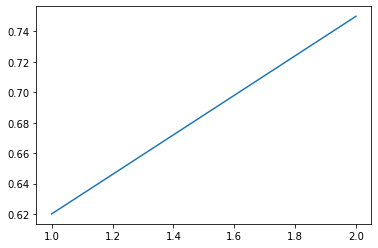

In [17]:
import matplotlib.pyplot as plt
import re
def read_score(filename):
    with open(filename) as f:
        x = f.readlines()[1]
        x = re.search(r'(?<=BLEU4 = )\d*\.\d*(?=,)', x)
        return float(x.group())

xs = range(1, 3)
ys = [read_score(f'94.{x}.score') for x in xs]
plt.plot(xs, ys)
plt.show()